<a href="https://colab.research.google.com/github/AnitaTasnim/ML_10_AiQuest_anita/blob/main/Copy_of_Copy_of_lung_cancer(with_better_accuracy).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import warnings
warnings.filterwarnings('ignore')

#**Importing Libraries and Loading dataset**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
colors=['#011f4b','#03396c','#005b96','#6497b1','#b3cde0']
sns.set_palette(sns.color_palette(colors))

In [4]:
df = pd.read_csv('/content/drive/MyDrive/BIO-ICT/ML in Bioinformatics: 4/LUNG-cancer_(Anita_Nipa)/GSE89843_TEP_Count_Matrix.csv')

In [5]:
df.head()

,Gene ID,UMCU-HC-1-0197-TR824,UMCU-HC-1-0198-TR820,UMCU-HC-1-0199-TR825,UMCU-HC-1-0200-TR816,UMCU-HC-1-0201-TR821,UMCU-HC-1-0202-TR812,UMCU-HC-1-0203-TR814,UMCU-HC-1-0204-TR813,UMCU-HC-1-0205-TR811,...,Vumc-NSCLC-1190-TR2199,Vumc-NSCLC-441-TR2238,UMCU-HC-1-0210-TR819,Vumc-HD-148-TR931,Vumc-HD-227-TR1716,Vumc-ChronPan-29-TR1045,UMCU-NSAth-1-0145-TR828,UMCU-1-0009-AP-stable-TR942,NKI-NSCLC-2194-TR1855,NKI-NSCLC-2417-TR1857
0,ENSG00000000419,12,0,72,8,33,2,4,12,5,...,16,0,0,0,0,0,0,0,0,7
1,ENSG00000000938,116,25,56,13,23,18,20,9,73,...,37,22,2,1,10,0,43,0,0,5
2,ENSG00000001036,68,19,21,17,52,35,25,6,20,...,13,33,0,0,0,4,0,0,0,1
3,ENSG00000001461,75,15,29,6,55,12,10,1,7,...,5,17,0,21,0,0,0,0,0,0
4,ENSG00000001629,51,55,45,19,37,40,47,2,14,...,16,10,2,25,3,0,0,0,1,1


#Data preprocessing

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#011f4b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Transpose index and columns. bcz sample name are defined as features, but we need gene symbol as features. </b></p>
</div>

In [6]:
df1 = df.T
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,4712,4713,4714,4715,4716,4717,4718,4719,4720,4721
Gene ID,ENSG00000000419,ENSG00000000938,ENSG00000001036,ENSG00000001461,ENSG00000001629,ENSG00000001631,ENSG00000002330,ENSG00000002549,ENSG00000002586,ENSG00000002822,...,ENSG00000267316,ENSG00000268555,ENSG00000269028,ENSG00000270055,ENSG00000271043,ENSG00000272053,ENSG00000272168,ENSG00000272369,ENSG00000272888,ENSG00000273143
UMCU-HC-1-0197-TR824,12,116,68,75,51,37,61,91,5976,1,...,225,340,584,68,181,873,40,70,39,0
UMCU-HC-1-0198-TR820,0,25,19,15,55,20,51,42,5811,6,...,322,142,1299,19,509,1256,94,70,34,0
UMCU-HC-1-0199-TR825,72,56,21,29,45,18,18,45,3677,55,...,148,143,322,18,81,665,56,35,42,0
UMCU-HC-1-0200-TR816,8,13,17,6,19,5,63,4,4001,2,...,366,102,752,24,231,1526,93,70,42,0


👉 | Dataset Information

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 780 entries, Gene ID to NKI-NSCLC-2417-TR1857
Columns: 4722 entries, 0 to 4721
dtypes: object(4722)
memory usage: 28.1+ MB


In [8]:
df1.info


<bound method DataFrame.info of                                         0                1     \
Gene ID                      ENSG00000000419  ENSG00000000938   
UMCU-HC-1-0197-TR824                      12              116   
UMCU-HC-1-0198-TR820                       0               25   
UMCU-HC-1-0199-TR825                      72               56   
UMCU-HC-1-0200-TR816                       8               13   
...                                      ...              ...   
Vumc-ChronPan-29-TR1045                    0                0   
UMCU-NSAth-1-0145-TR828                    0               43   
UMCU-1-0009-AP-stable-TR942                0                0   
NKI-NSCLC-2194-TR1855                      0                0   
NKI-NSCLC-2417-TR1857                      7                5   

                                        2                3     \
Gene ID                      ENSG00000001036  ENSG00000001461   
UMCU-HC-1-0197-TR824                      68             

In [9]:
df1.to_csv("something.csv") #eta google drive a ( /content/drive/MyDrive/BIO-ICT/lung-cancer/something (1).csv ) ei path a save ache

In [10]:
dff = pd.read_csv('/content/drive/MyDrive/BIO-ICT/ML in Bioinformatics: 4/LUNG-cancer_(Anita_Nipa)/something (1).csv')

In [11]:
dff1 = dff.copy()

In [12]:
dff.head() #now we have row column in right way in our dataset, but we need to correct our column header :)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,4712,4713,4714,4715,4716,4717,4718,4719,4720,4721
0,Gene ID,ENSG00000000419,ENSG00000000938,ENSG00000001036,ENSG00000001461,ENSG00000001629,ENSG00000001631,ENSG00000002330,ENSG00000002549,ENSG00000002586,...,ENSG00000267316,ENSG00000268555,ENSG00000269028,ENSG00000270055,ENSG00000271043,ENSG00000272053,ENSG00000272168,ENSG00000272369,ENSG00000272888,ENSG00000273143
1,UMCU-HC-1-0197-TR824,12,116,68,75,51,37,61,91,5976,...,225,340,584,68,181,873,40,70,39,0
2,UMCU-HC-1-0198-TR820,0,25,19,15,55,20,51,42,5811,...,322,142,1299,19,509,1256,94,70,34,0
3,UMCU-HC-1-0199-TR825,72,56,21,29,45,18,18,45,3677,...,148,143,322,18,81,665,56,35,42,0
4,UMCU-HC-1-0200-TR816,8,13,17,6,19,5,63,4,4001,...,366,102,752,24,231,1526,93,70,42,0


In [13]:
dff.shape

(780, 4723)

👉 | 
here in the 1st row  column header of features are placed as data value, and column header as integer values, we can't specify column using these int value, and also if we train our model with this dataset , accuracy will low, bcz 1st row is not worth. as it does not contain any value.
so we have to  Convert row to column header using DataFrame.iloc[] 

In [14]:
# Convert row to column header using DataFrame.iloc[]
dff.columns = dff.iloc[0]

In [15]:
dff['Gene ID']

0                          Gene ID
1             UMCU-HC-1-0197-TR824
2             UMCU-HC-1-0198-TR820
3             UMCU-HC-1-0199-TR825
4             UMCU-HC-1-0200-TR816
                  ...             
775        Vumc-ChronPan-29-TR1045
776        UMCU-NSAth-1-0145-TR828
777    UMCU-1-0009-AP-stable-TR942
778          NKI-NSCLC-2194-TR1855
779          NKI-NSCLC-2417-TR1857
Name: Gene ID, Length: 780, dtype: object

In [16]:
dff.head(50)

,Gene ID,ENSG00000000419,ENSG00000000938,ENSG00000001036,ENSG00000001461,ENSG00000001629,ENSG00000001631,ENSG00000002330,ENSG00000002549,ENSG00000002586,...,ENSG00000267316,ENSG00000268555,ENSG00000269028,ENSG00000270055,ENSG00000271043,ENSG00000272053,ENSG00000272168,ENSG00000272369,ENSG00000272888,ENSG00000273143
0,Gene ID,ENSG00000000419,ENSG00000000938,ENSG00000001036,ENSG00000001461,ENSG00000001629,ENSG00000001631,ENSG00000002330,ENSG00000002549,ENSG00000002586,...,ENSG00000267316,ENSG00000268555,ENSG00000269028,ENSG00000270055,ENSG00000271043,ENSG00000272053,ENSG00000272168,ENSG00000272369,ENSG00000272888,ENSG00000273143
1,UMCU-HC-1-0197-TR824,12,116,68,75,51,37,61,91,5976,...,225,340,584,68,181,873,40,70,39,0
2,UMCU-HC-1-0198-TR820,0,25,19,15,55,20,51,42,5811,...,322,142,1299,19,509,1256,94,70,34,0
3,UMCU-HC-1-0199-TR825,72,56,21,29,45,18,18,45,3677,...,148,143,322,18,81,665,56,35,42,0
4,UMCU-HC-1-0200-TR816,8,13,17,6,19,5,63,4,4001,...,366,102,752,24,231,1526,93,70,42,0
5,UMCU-HC-1-0201-TR821,33,23,52,55,37,20,75,79,7654,...,246,326,616,25,170,766,80,36,57,57
6,UMCU-HC-1-0202-TR812,2,18,35,12,40,17,50,67,6603,...,182,135,584,13,199,613,24,29,41,20
7,UMCU-HC-1-0203-TR814,4,20,25,10,47,35,46,24,4934,...,188,33,675,16,249,435,70,62,26,34
8,UMCU-HC-1-0204-TR813,12,9,6,1,2,3,5,7,428,...,47,22,62,3,31,107,6,7,3,0
9,UMCU-HC-1-0205-TR811,5,73,20,7,14,9,21,6,1136,...,67,39,245,5,83,221,9,8,10,0


👉 | after correcting the column header , we need to drop the 1st row, as it contains the column header as data value.

In [17]:
# Drop first row 
# by selecting all rows from first row onwards
dff = dff.iloc[1: , :]

In [18]:
dff.head()

,Gene ID,ENSG00000000419,ENSG00000000938,ENSG00000001036,ENSG00000001461,ENSG00000001629,ENSG00000001631,ENSG00000002330,ENSG00000002549,ENSG00000002586,...,ENSG00000267316,ENSG00000268555,ENSG00000269028,ENSG00000270055,ENSG00000271043,ENSG00000272053,ENSG00000272168,ENSG00000272369,ENSG00000272888,ENSG00000273143
1,UMCU-HC-1-0197-TR824,12,116,68,75,51,37,61,91,5976,...,225,340,584,68,181,873,40,70,39,0
2,UMCU-HC-1-0198-TR820,0,25,19,15,55,20,51,42,5811,...,322,142,1299,19,509,1256,94,70,34,0
3,UMCU-HC-1-0199-TR825,72,56,21,29,45,18,18,45,3677,...,148,143,322,18,81,665,56,35,42,0
4,UMCU-HC-1-0200-TR816,8,13,17,6,19,5,63,4,4001,...,366,102,752,24,231,1526,93,70,42,0
5,UMCU-HC-1-0201-TR821,33,23,52,55,37,20,75,79,7654,...,246,326,616,25,170,766,80,36,57,57


👉 | Now I need to find the Target column and add it to this dataset; so from 'metadata.csv' dataset we collect 'disease' column and add this to our 'something.csv' dataset :)

In [19]:
df_disease = pd.read_csv('/content/drive/MyDrive/BIO-ICT/ML in Bioinformatics: 4/LUNG-cancer_(Anita_Nipa)/metadata.csv')

In [20]:
df_disease.head()

,Unnamed: 0,characteristics,disease
0,GSM2390709,Blood_Platelets_UMCU-Healthy Control-1-0197-TR824,Healthy Control
1,GSM2390710,Blood_Platelets_UMCU-Healthy Control-1-0198-TR820,Healthy Control
2,GSM2390711,Blood_Platelets_UMCU-Healthy Control-1-0199-TR825,Healthy Control
3,GSM2390712,Blood_Platelets_UMCU-Healthy Control-1-0200-TR816,Healthy Control
4,GSM2390713,Blood_Platelets_UMCU-Healthy Control-1-0201-TR821,Healthy Control


In [21]:
df_disease['disease'].head()

0    Healthy Control
1    Healthy Control
2    Healthy Control
3    Healthy Control
4    Healthy Control
Name: disease, dtype: object

👉 | **Now set index from 0**

 bcz indexing of this data set is set from 1, bt we need this from 0, Otherwise we can't merge target column (disease) correctly to our existing data set

In [22]:
dff.reset_index(inplace = True, drop = True)

In [23]:
dff.head()

,Gene ID,ENSG00000000419,ENSG00000000938,ENSG00000001036,ENSG00000001461,ENSG00000001629,ENSG00000001631,ENSG00000002330,ENSG00000002549,ENSG00000002586,...,ENSG00000267316,ENSG00000268555,ENSG00000269028,ENSG00000270055,ENSG00000271043,ENSG00000272053,ENSG00000272168,ENSG00000272369,ENSG00000272888,ENSG00000273143
0,UMCU-HC-1-0197-TR824,12,116,68,75,51,37,61,91,5976,...,225,340,584,68,181,873,40,70,39,0
1,UMCU-HC-1-0198-TR820,0,25,19,15,55,20,51,42,5811,...,322,142,1299,19,509,1256,94,70,34,0
2,UMCU-HC-1-0199-TR825,72,56,21,29,45,18,18,45,3677,...,148,143,322,18,81,665,56,35,42,0
3,UMCU-HC-1-0200-TR816,8,13,17,6,19,5,63,4,4001,...,366,102,752,24,231,1526,93,70,42,0
4,UMCU-HC-1-0201-TR821,33,23,52,55,37,20,75,79,7654,...,246,326,616,25,170,766,80,36,57,57


In [24]:
dff['disease'] = df_disease['disease']

In [25]:
dff.head()

,Gene ID,ENSG00000000419,ENSG00000000938,ENSG00000001036,ENSG00000001461,ENSG00000001629,ENSG00000001631,ENSG00000002330,ENSG00000002549,ENSG00000002586,...,ENSG00000268555,ENSG00000269028,ENSG00000270055,ENSG00000271043,ENSG00000272053,ENSG00000272168,ENSG00000272369,ENSG00000272888,ENSG00000273143,disease
0,UMCU-HC-1-0197-TR824,12,116,68,75,51,37,61,91,5976,...,340,584,68,181,873,40,70,39,0,Healthy Control
1,UMCU-HC-1-0198-TR820,0,25,19,15,55,20,51,42,5811,...,142,1299,19,509,1256,94,70,34,0,Healthy Control
2,UMCU-HC-1-0199-TR825,72,56,21,29,45,18,18,45,3677,...,143,322,18,81,665,56,35,42,0,Healthy Control
3,UMCU-HC-1-0200-TR816,8,13,17,6,19,5,63,4,4001,...,102,752,24,231,1526,93,70,42,0,Healthy Control
4,UMCU-HC-1-0201-TR821,33,23,52,55,37,20,75,79,7654,...,326,616,25,170,766,80,36,57,57,Healthy Control


In [26]:
dff['Gene ID']

0             UMCU-HC-1-0197-TR824
1             UMCU-HC-1-0198-TR820
2             UMCU-HC-1-0199-TR825
3             UMCU-HC-1-0200-TR816
4             UMCU-HC-1-0201-TR821
                  ...             
774        Vumc-ChronPan-29-TR1045
775        UMCU-NSAth-1-0145-TR828
776    UMCU-1-0009-AP-stable-TR942
777          NKI-NSCLC-2194-TR1855
778          NKI-NSCLC-2417-TR1857
Name: Gene ID, Length: 779, dtype: object

# <b>3 <span style='color:#6497b1'>|</span> Understanding Our Data</b>

In [27]:
#What is the shape of the dataset?
dff.shape

(779, 4724)

In [28]:
#Some info about our attributes and its datatype

dff.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779 entries, 0 to 778
Data columns (total 4724 columns):
 #     Column           Non-Null Count  Dtype 
---    ------           --------------  ----- 
 0     Gene ID          779 non-null    object
 1     ENSG00000000419  779 non-null    object
 2     ENSG00000000938  779 non-null    object
 3     ENSG00000001036  779 non-null    object
 4     ENSG00000001461  779 non-null    object
 5     ENSG00000001629  779 non-null    object
 6     ENSG00000001631  779 non-null    object
 7     ENSG00000002330  779 non-null    object
 8     ENSG00000002549  779 non-null    object
 9     ENSG00000002586  779 non-null    object
 10    ENSG00000002822  779 non-null    object
 11    ENSG00000002834  779 non-null    object
 12    ENSG00000003056  779 non-null    object
 13    ENSG00000003402  779 non-null    object
 14    ENSG00000003436  779 non-null    object
 15    ENSG00000003756  779 non-null    object
 16    ENSG00000004059  779 non-null    object


In [29]:
#Some analysis on the numerical columns
dff.describe()

,Gene ID,ENSG00000000419,ENSG00000000938,ENSG00000001036,ENSG00000001461,ENSG00000001629,ENSG00000001631,ENSG00000002330,ENSG00000002549,ENSG00000002586,...,ENSG00000268555,ENSG00000269028,ENSG00000270055,ENSG00000271043,ENSG00000272053,ENSG00000272168,ENSG00000272369,ENSG00000272888,ENSG00000273143,disease
count,779,779,779,779,779,779,779,779,779,779,...,779,779,779,779,779,779,779,779,779,779
unique,779,117,269,136,148,121,130,129,230,736,...,292,486,118,301,568,158,120,125,102,10
top,UMCU-HC-1-0197-TR824,0,1,0,0,1,0,0,0,289,...,2,37,0,15,13,0,0,0,0,NSCLC
freq,1,119,23,51,96,31,63,32,37,3,...,20,7,66,13,6,53,46,34,180,402


In [30]:
#Check for null values
df.isnull().sum()

Gene ID                        0
UMCU-HC-1-0197-TR824           0
UMCU-HC-1-0198-TR820           0
UMCU-HC-1-0199-TR825           0
UMCU-HC-1-0200-TR816           0
                              ..
Vumc-ChronPan-29-TR1045        0
UMCU-NSAth-1-0145-TR828        0
UMCU-1-0009-AP-stable-TR942    0
NKI-NSCLC-2194-TR1855          0
NKI-NSCLC-2417-TR1857          0
Length: 780, dtype: int64

**Great we have no null values in the dataset!**

In [31]:
#Check for duplicates in the dataset
df.duplicated().sum()

0

**Great we have no duplicate values in the dataset!**

In [32]:
dff['disease'].value_counts()  #Return a Series containing counts of unique values.

NSCLC                              402
Healthy Control                    231
Multiple Sclerosis                  58
Pulmonary Hypertension              34
Epilepsy                            21
Non-significant Atherosclerosis     12
Unstable Angina Pectoris             6
nonCancer                            6
Chronic Pancreatitis                 5
Stable Angina Pectoris               4
Name: disease, dtype: int64

In [33]:
# Convert all columns to int dtype.
# This returns error in our DataFrame
#df = df.astype('int')

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#011f4b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Encoding of Categorical Columns</b></p>
</div>

**A short preprocessing step before we move on to Exploratory Data Analysis for easy implementation of graphs. Here we are encoding <mark> disease </mark>       column.**

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
le = LabelEncoder()

In [36]:
dff.disease = le.fit_transform(dff.disease)

In [37]:
dff.head()

,Gene ID,ENSG00000000419,ENSG00000000938,ENSG00000001036,ENSG00000001461,ENSG00000001629,ENSG00000001631,ENSG00000002330,ENSG00000002549,ENSG00000002586,...,ENSG00000268555,ENSG00000269028,ENSG00000270055,ENSG00000271043,ENSG00000272053,ENSG00000272168,ENSG00000272369,ENSG00000272888,ENSG00000273143,disease
0,UMCU-HC-1-0197-TR824,12,116,68,75,51,37,61,91,5976,...,340,584,68,181,873,40,70,39,0,2
1,UMCU-HC-1-0198-TR820,0,25,19,15,55,20,51,42,5811,...,142,1299,19,509,1256,94,70,34,0,2
2,UMCU-HC-1-0199-TR825,72,56,21,29,45,18,18,45,3677,...,143,322,18,81,665,56,35,42,0,2
3,UMCU-HC-1-0200-TR816,8,13,17,6,19,5,63,4,4001,...,102,752,24,231,1526,93,70,42,0,2
4,UMCU-HC-1-0201-TR821,33,23,52,55,37,20,75,79,7654,...,326,616,25,170,766,80,36,57,57,2


<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#011f4b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Now we need to drop other disease, we only care for NSCLC(402) and Healthy Control(231) here</b></p>
</div>


so we will drop all values without 4 and 2

In [38]:
dff['disease'].value_counts()

4    402
2    231
3     58
6     34
1     21
5     12
8      6
9      6
0      5
7      4
Name: disease, dtype: int64

In [39]:
dff[dff['disease'] == 2]

,Gene ID,ENSG00000000419,ENSG00000000938,ENSG00000001036,ENSG00000001461,ENSG00000001629,ENSG00000001631,ENSG00000002330,ENSG00000002549,ENSG00000002586,...,ENSG00000268555,ENSG00000269028,ENSG00000270055,ENSG00000271043,ENSG00000272053,ENSG00000272168,ENSG00000272369,ENSG00000272888,ENSG00000273143,disease
0,UMCU-HC-1-0197-TR824,12,116,68,75,51,37,61,91,5976,...,340,584,68,181,873,40,70,39,0,2
1,UMCU-HC-1-0198-TR820,0,25,19,15,55,20,51,42,5811,...,142,1299,19,509,1256,94,70,34,0,2
2,UMCU-HC-1-0199-TR825,72,56,21,29,45,18,18,45,3677,...,143,322,18,81,665,56,35,42,0,2
3,UMCU-HC-1-0200-TR816,8,13,17,6,19,5,63,4,4001,...,102,752,24,231,1526,93,70,42,0,2
4,UMCU-HC-1-0201-TR821,33,23,52,55,37,20,75,79,7654,...,326,616,25,170,766,80,36,57,57,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,Vumc-HD-280-TR1870,5,44,11,0,3,9,20,8,1020,...,33,307,9,118,118,7,7,14,3,2
227,Vumc-HD-238-TR1878,23,138,30,3,4,1,0,172,411,...,1,31,6,10,25,2,0,6,0,2
720,NKI-NSCLC-2237-TR1853,9,33,8,1,21,4,3,21,853,...,1,50,4,15,145,1,3,10,0,2
721,NKI-NSCLC-2314-TR1854,1,1,1,0,3,3,0,11,77,...,3,35,2,14,6,0,1,0,4,2


In [40]:
for x in range(10):
    if (x==2) or (x==4):
        continue;
    
    dff.drop(dff.index[dff['disease']==x],inplace=True)

 

In [41]:
#dff.drop(dff.index[dff['disease']==3],inplace=True)
#dff.drop(dff.index[dff['disease']==1],inplace=True)
#dff.drop(dff.index[dff['disease']==0],inplace=True)
#dff.drop(dff.index[dff['disease']==5],inplace=True)

In [42]:
dff['disease'].value_counts()

4    402
2    231
Name: disease, dtype: int64

In [43]:
dff.head()

,Gene ID,ENSG00000000419,ENSG00000000938,ENSG00000001036,ENSG00000001461,ENSG00000001629,ENSG00000001631,ENSG00000002330,ENSG00000002549,ENSG00000002586,...,ENSG00000268555,ENSG00000269028,ENSG00000270055,ENSG00000271043,ENSG00000272053,ENSG00000272168,ENSG00000272369,ENSG00000272888,ENSG00000273143,disease
0,UMCU-HC-1-0197-TR824,12,116,68,75,51,37,61,91,5976,...,340,584,68,181,873,40,70,39,0,2
1,UMCU-HC-1-0198-TR820,0,25,19,15,55,20,51,42,5811,...,142,1299,19,509,1256,94,70,34,0,2
2,UMCU-HC-1-0199-TR825,72,56,21,29,45,18,18,45,3677,...,143,322,18,81,665,56,35,42,0,2
3,UMCU-HC-1-0200-TR816,8,13,17,6,19,5,63,4,4001,...,102,752,24,231,1526,93,70,42,0,2
4,UMCU-HC-1-0201-TR821,33,23,52,55,37,20,75,79,7654,...,326,616,25,170,766,80,36,57,57,2


In [44]:
dff.shape

(633, 4724)

In [45]:
labels = dff.disease
labels

0      2
1      2
2      2
3      2
4      2
      ..
768    4
769    4
770    4
777    4
778    4
Name: disease, Length: 633, dtype: int64

In [46]:
dff['disease'].value_counts()

4    402
2    231
Name: disease, dtype: int64

In [47]:
402/(231+402)

0.6350710900473934

In [48]:
231/(231+402)

0.36492890995260663

# <b>4 <span style='color:#6497b1'>|</span> Exploratory Data Analysis</b>

fig,ax = plt.subplots(4723,2,figsize=(30,90))
for index,i in enumerate(dff.columns):
    sns.countplot(data=dff,x=i,ax=ax[index,0])
    sns.countplot(data=dff,x=i,ax=ax[index,1],hue='disease')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing Categorical Columns",fontsize=50)

In [49]:
dff.skew()

0
ENSG00000000419    2.539346
ENSG00000000938    4.387556
ENSG00000001036    1.432500
ENSG00000001461    3.798686
ENSG00000001629    1.832785
                     ...   
ENSG00000272168    1.436493
ENSG00000272369    2.036310
ENSG00000272888    0.981122
ENSG00000273143    4.761662
disease           -0.562481
Length: 4723, dtype: float64

In [50]:
dff.head()

,Gene ID,ENSG00000000419,ENSG00000000938,ENSG00000001036,ENSG00000001461,ENSG00000001629,ENSG00000001631,ENSG00000002330,ENSG00000002549,ENSG00000002586,...,ENSG00000268555,ENSG00000269028,ENSG00000270055,ENSG00000271043,ENSG00000272053,ENSG00000272168,ENSG00000272369,ENSG00000272888,ENSG00000273143,disease
0,UMCU-HC-1-0197-TR824,12,116,68,75,51,37,61,91,5976,...,340,584,68,181,873,40,70,39,0,2
1,UMCU-HC-1-0198-TR820,0,25,19,15,55,20,51,42,5811,...,142,1299,19,509,1256,94,70,34,0,2
2,UMCU-HC-1-0199-TR825,72,56,21,29,45,18,18,45,3677,...,143,322,18,81,665,56,35,42,0,2
3,UMCU-HC-1-0200-TR816,8,13,17,6,19,5,63,4,4001,...,102,752,24,231,1526,93,70,42,0,2
4,UMCU-HC-1-0201-TR821,33,23,52,55,37,20,75,79,7654,...,326,616,25,170,766,80,36,57,57,2


In [51]:
dff.corr()

,disease
0,
disease,1.0


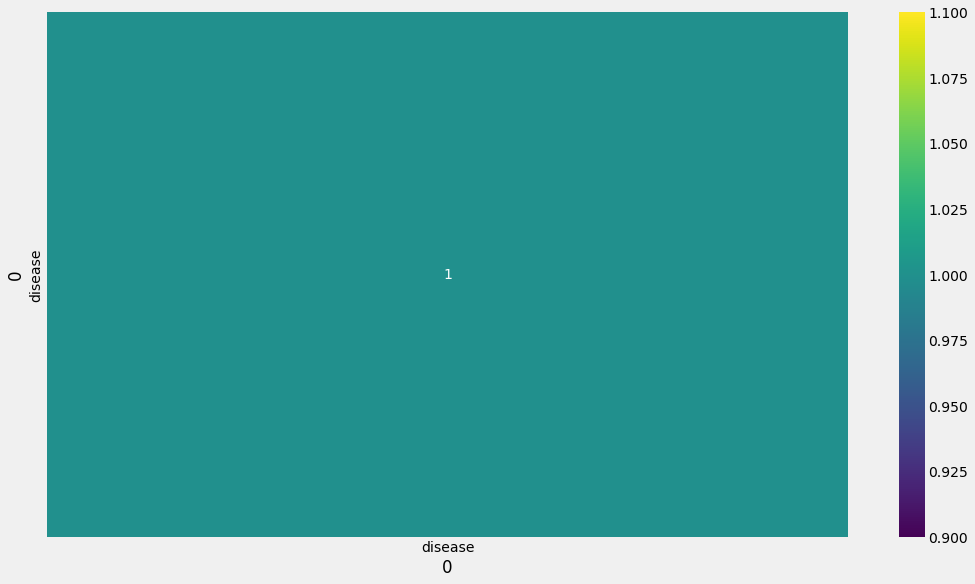

In [52]:
plt.figure(figsize=(16,9))
ax = sns.heatmap(dff.corr(),annot = True,cmap = 'viridis')
plt.show()

#X Y specification

In [53]:
X = dff.drop(['disease', 'Gene ID'], axis=1)

In [54]:
Y = dff['disease']

In [55]:
X.head()


,ENSG00000000419,ENSG00000000938,ENSG00000001036,ENSG00000001461,ENSG00000001629,ENSG00000001631,ENSG00000002330,ENSG00000002549,ENSG00000002586,ENSG00000002822,...,ENSG00000267316,ENSG00000268555,ENSG00000269028,ENSG00000270055,ENSG00000271043,ENSG00000272053,ENSG00000272168,ENSG00000272369,ENSG00000272888,ENSG00000273143
0,12,116,68,75,51,37,61,91,5976,1,...,225,340,584,68,181,873,40,70,39,0
1,0,25,19,15,55,20,51,42,5811,6,...,322,142,1299,19,509,1256,94,70,34,0
2,72,56,21,29,45,18,18,45,3677,55,...,148,143,322,18,81,665,56,35,42,0
3,8,13,17,6,19,5,63,4,4001,2,...,366,102,752,24,231,1526,93,70,42,0
4,33,23,52,55,37,20,75,79,7654,8,...,246,326,616,25,170,766,80,36,57,57


In [56]:
X.shape

(633, 4722)

In [57]:
X_column_header = X.head(0)

In [58]:
X_column_header

,ENSG00000000419,ENSG00000000938,ENSG00000001036,ENSG00000001461,ENSG00000001629,ENSG00000001631,ENSG00000002330,ENSG00000002549,ENSG00000002586,ENSG00000002822,...,ENSG00000267316,ENSG00000268555,ENSG00000269028,ENSG00000270055,ENSG00000271043,ENSG00000272053,ENSG00000272168,ENSG00000272369,ENSG00000272888,ENSG00000273143


In [59]:
Y.head()

0    2
1    2
2    2
3    2
4    2
Name: disease, dtype: int64

**Changing values of disease from 4,2 to 1,0**

In [60]:
Y = Y.replace([4,2], [1,0])

In [61]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: disease, dtype: int64

In [62]:
Y.value_counts()

1    402
0    231
Name: disease, dtype: int64

#over Sampling

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#011f4b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Oversampling of Minority Class</b></p>
</div>

In [63]:
from imblearn.over_sampling import RandomOverSampler
x_new,y_new=RandomOverSampler().fit_resample(X,Y)

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#011f4b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Train Test Split</b></p>
</div>

In [64]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_new,y_new,random_state=42,train_size=.75)
print(f'Train shape : {xtrain.shape}\nTest shape: {xtest.shape}')

Train shape : (603, 4722)
Test shape: (201, 4722)


In [65]:
y_new.value_counts()

0    402
1    402
Name: disease, dtype: int64

In [66]:
print(x_new.duplicated().sum())

171


<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#011f4b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Scaling of All column in X</b></p>
</div>

In [67]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

for column in X.columns:
    
    xtrain[column] = scaler.fit_transform(xtrain[[column]])
    xtest[column] = scaler.transform(xtest[[column]])
    #X[column] = le.fit_transform(df7[column])
    pass
    

In [68]:
xtrain.head()

,ENSG00000000419,ENSG00000000938,ENSG00000001036,ENSG00000001461,ENSG00000001629,ENSG00000001631,ENSG00000002330,ENSG00000002549,ENSG00000002586,ENSG00000002822,...,ENSG00000267316,ENSG00000268555,ENSG00000269028,ENSG00000270055,ENSG00000271043,ENSG00000272053,ENSG00000272168,ENSG00000272369,ENSG00000272888,ENSG00000273143
181,2.270415,0.359595,1.655823,0.326606,0.621039,0.264727,0.628694,0.626855,0.748706,3.730084,...,1.665048,-0.276862,0.227472,0.270873,0.390054,-0.059567,0.644651,2.139349,1.371557,-0.431533
628,-0.791151,-0.646091,-1.088798,-0.790909,-0.806990,-0.966080,-1.149783,-0.823652,-1.013060,-0.610229,...,-0.899816,-0.744204,-0.758662,-0.860267,-0.732301,-0.820363,-1.070367,-0.717095,-1.005200,-0.477313
742,0.049279,-0.002452,0.600200,-0.455654,0.392554,1.923641,0.743434,-0.613433,0.636890,-0.722965,...,1.424592,1.819500,-0.299309,0.723330,-0.215261,-0.072163,0.449762,0.882513,0.933733,-0.477313
723,-0.490997,-0.525408,-0.930454,-0.641907,-0.578506,-0.537973,-1.149783,-0.697521,-0.891852,-0.553862,...,-0.579208,-0.810967,-0.876661,-0.351254,-0.896240,-0.757383,-0.641613,-0.374322,-0.504830,-0.339973
158,0.529525,1.757498,-0.560986,-0.343903,-0.806990,-0.805540,-0.748191,0.774008,-0.750070,1.644479,...,-0.739512,-0.557267,-0.699663,-0.351254,-0.757522,-0.664173,-0.836501,-0.831353,0.308271,-0.477313


In [69]:
xtest.head()

,ENSG00000000419,ENSG00000000938,ENSG00000001036,ENSG00000001461,ENSG00000001629,ENSG00000001631,ENSG00000002330,ENSG00000002549,ENSG00000002586,ENSG00000002822,...,ENSG00000267316,ENSG00000268555,ENSG00000269028,ENSG00000270055,ENSG00000271043,ENSG00000272053,ENSG00000272168,ENSG00000272369,ENSG00000272888,ENSG00000273143
192,-0.551028,-0.555579,-0.666548,-0.269402,-0.121536,-0.912567,-0.461340,-0.298106,-0.636465,-0.553862,...,-0.726153,-0.704146,-0.855590,-0.803710,-0.883630,-0.712037,-0.797523,-0.488580,-1.067746,-0.477313
717,-0.070782,-0.334328,0.811325,0.326606,0.278312,-0.056353,-0.748191,-0.277084,0.110463,-0.441126,...,0.876887,0.230538,-0.434165,1.062672,-0.139596,0.119296,-0.563657,-0.145807,-0.192099,-0.477313
168,-0.370936,-0.505295,-0.191518,-0.753658,-0.692748,-0.805540,-0.977672,-0.760586,-0.745597,-0.384759,...,-0.499056,-0.637383,-0.859804,-0.294697,-0.820576,-0.573482,-0.953434,-0.659966,-0.192099,-0.385753
522,0.289402,0.299254,0.125169,0.550109,0.506796,1.067427,0.800804,0.059266,0.611396,1.024434,...,-0.846381,-0.049868,-0.762877,-0.068469,-0.555751,-0.515540,-0.602635,0.139838,-0.317191,0.529850
536,-0.310905,-0.394669,-0.349861,-0.716408,-0.350021,-0.752027,-0.633451,-0.445259,-0.595317,-0.497494,...,-0.966609,-0.530562,-0.008526,-0.294697,-0.164818,-0.407215,-0.953434,-0.659966,-0.942653,-0.339973


# <b>5 <span style='color:#6497b1'>|</span>Model Building</b>

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#011f4b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Metric to Use: Recall</b></p>
</div>

## $Recall = \frac{True Positives}{(True Positives + False Negatives)}$ <br>

### Recall would be the best metric because here were are concerned about measuring how many Lung Cancer Patients were missclassified as Non Lung Cancer.<br> Reduce False Negatives!

# <b>Model Building</b>

**KNeighbors Classifier - 97%**

In [70]:

from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier


In [71]:
knn=KNeighborsClassifier()

In [72]:
param_grid={'n_neighbors':[1,4,5,7,10,12,50,100,500,300,200,30,40,70,1000], 'weights':['uniform', 'distance']}

In [73]:
rcv_knn=RandomizedSearchCV(knn,param_grid,cv=50)
rcv_knn.fit(xtrain,ytrain)

RandomizedSearchCV(cv=50, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': [1, 4, 5, 7, 10, 12, 50,
                                                        100, 500, 300, 200, 30,
                                                        40, 70, 1000],
                                        'weights': ['uniform', 'distance']})

In [74]:
y_pred_knn=rcv_knn.predict(xtest)

In [75]:
ytest.shape

(201,)

In [76]:
xtest.shape

(201, 4722)

Text(24.58, 0.5, 'Actual')

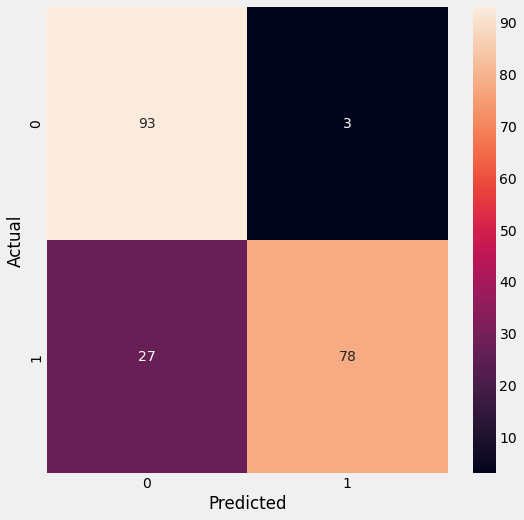

In [77]:
from sklearn.metrics import confusion_matrix
confusion_knn=confusion_matrix(ytest,rcv_knn.predict(xtest))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_knn,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [78]:
27+78+91+5


201

In [79]:
from sklearn.metrics import classification_report
print(classification_report(ytest,y_pred_knn))
print(f'\nBest Parameters of KNN  model is : {rcv_knn.best_params_}\n')

              precision    recall  f1-score   support

           0       0.78      0.97      0.86        96
           1       0.96      0.74      0.84       105

    accuracy                           0.85       201
   macro avg       0.87      0.86      0.85       201
weighted avg       0.87      0.85      0.85       201


Best Parameters of KNN  model is : {'weights': 'distance', 'n_neighbors': 1}



In [80]:
rcv_knn.score(xtest,ytest)

0.8507462686567164

crosscheck

In [81]:
model_knn = KNeighborsClassifier(weights = 'uniform', n_neighbors = 1)

model_knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=1)

In [82]:
model_knn.score(xtest,ytest)

0.8507462686567164

**Support Vector Machine - 98%**


***(Support Vector Classifier)***

In [83]:
from sklearn.svm import SVC

In [84]:
param_grid={'C':[0.001,0.01,0.1,1,10,100,1000], 'gamma':[0.001,0.01,0.1,1,10,100, 1000], 'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'] }

In [85]:
rcv_svc=RandomizedSearchCV(SVC(),param_grid,cv=50)


In [86]:
rcv_svc.fit(xtrain,ytrain)

RandomizedSearchCV(cv=50, estimator=SVC(),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'gamma': [0.001, 0.01, 0.1, 1, 10, 100,
                                                  1000],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']})

In [87]:
y_pred_svc=rcv_svc.predict(xtest)

Text(24.58, 0.5, 'Actual')

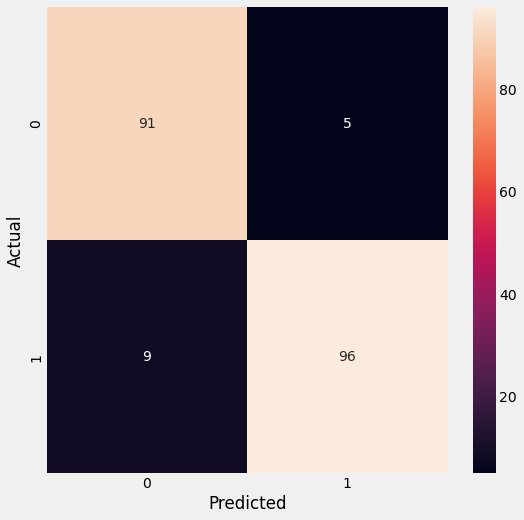

In [88]:
confusion_svc=confusion_matrix(ytest,rcv_svc.predict(xtest))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_svc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [89]:
print(classification_report(ytest,y_pred_svc))
print(f'\nBest Parameters of SVC model is : {rcv_svc.best_params_}\n')

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        96
           1       0.95      0.91      0.93       105

    accuracy                           0.93       201
   macro avg       0.93      0.93      0.93       201
weighted avg       0.93      0.93      0.93       201


Best Parameters of SVC model is : {'kernel': 'linear', 'gamma': 1000, 'C': 0.001}



In [90]:
rcv_svc.score(xtest,ytest)

0.9303482587064676

crosscheck

In [91]:
model = SVC(kernel = 'linear', gamma = 0.01, C = 1000)

model.fit(xtrain, ytrain)

SVC(C=1000, gamma=0.01, kernel='linear')

In [92]:
model.score(xtest,ytest)

0.945273631840796

**Logistic Regression - 89%**

In [93]:
from sklearn.linear_model import LogisticRegression

In [94]:
param_grid={'C':[0.001,0.01,0.1,1,10,100,1000,50,0.00001,1500], 'max_iter':[50,75,100,200,300,400,500,700,1000,10000,5000,10,2,5,1500] , 'penalty' : ['l1', 'l2', 'elasticnet', 'none'] , 'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [95]:
log=RandomizedSearchCV(LogisticRegression(),param_grid,cv=50)
log.fit(xtrain,ytrain)

RandomizedSearchCV(cv=50, estimator=LogisticRegression(),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000, 50, 1e-05, 1500],
                                        'max_iter': [50, 75, 100, 200, 300, 400,
                                                     500, 700, 1000, 10000,
                                                     5000, 10, 2, 5, 1500],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']})

In [96]:
y_pred_log=log.predict(xtest)

Text(24.58, 0.5, 'Actual')

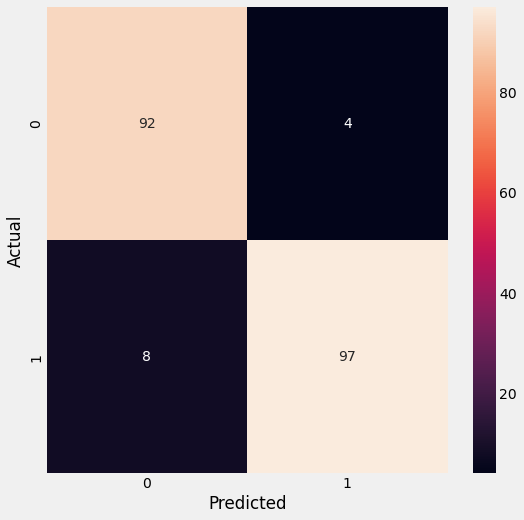

In [97]:
confusion_log=confusion_matrix(ytest,log.predict(xtest))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_log,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [98]:
print(classification_report(ytest,y_pred_log))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        96
           1       0.96      0.92      0.94       105

    accuracy                           0.94       201
   macro avg       0.94      0.94      0.94       201
weighted avg       0.94      0.94      0.94       201



In [99]:
print(f'\nBest Parameters of Logistic Regression  model is : {log.best_params_}\n')


Best Parameters of Logistic Regression  model is : {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 400, 'C': 50}



crosscheck

In [100]:
logistic_model = LogisticRegression(solver = 'lbfgs', penalty = 'l2', max_iter = 300, C = 0.1)

logistic_model.fit(xtrain, ytrain)

LogisticRegression(C=0.1, max_iter=300)

In [101]:
logistic_model.score(xtest,ytest)

0.9402985074626866

**Random Forest Classifier - 97%**

In [104]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
param_grid = {
'n_estimators': [50, 75,100, 150, 200,300,100,1000,500,4,5,10,1],
}

In [106]:
rcv=RandomizedSearchCV(RandomForestClassifier(random_state=42),param_grid,cv=50)
rcv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=50, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'n_estimators': [50, 75, 100, 150, 200,
                                                         300, 100, 1000, 500, 4,
                                                         5, 10, 1]})

In [107]:
y_pred_rcv=rcv.predict(xtest)

Text(24.58, 0.5, 'Actual')

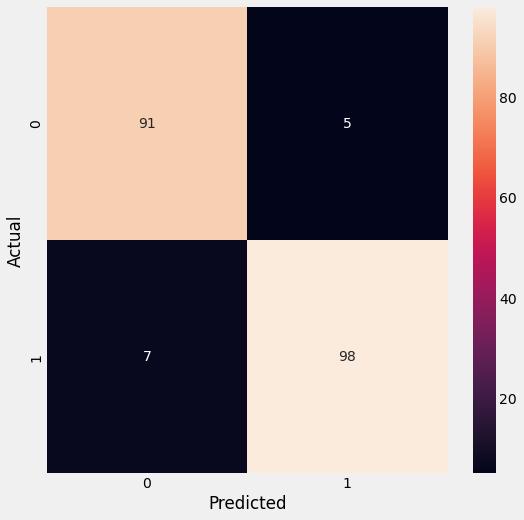

In [108]:
confusion_rcv=confusion_matrix(ytest,rcv.predict(xtest))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_rcv,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [109]:
print(classification_report(ytest,y_pred_rcv))
print(f'\nBest Parameter: {rcv.best_params_}\n')

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        96
           1       0.95      0.93      0.94       105

    accuracy                           0.94       201
   macro avg       0.94      0.94      0.94       201
weighted avg       0.94      0.94      0.94       201


Best Parameter: {'n_estimators': 1000}



crosscheck

In [110]:
random_forest_model = RandomForestClassifier(n_estimators = 50)

random_forest_model.fit(xtrain, ytrain)

RandomForestClassifier(n_estimators=50)

In [111]:
random_forest_model.score(xtest,ytest)

0.9203980099502488

**SGD (Stochastic gradient descent ) - 93%**

In [112]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()

In [113]:
sgd.fit(xtrain,ytrain)

SGDClassifier()

In [114]:
sgd.score(xtest,ytest) #under a chilo 82%

0.9502487562189055

In [115]:
y_pred_sgd=sgd.predict(xtest)

Text(24.58, 0.5, 'Actual')

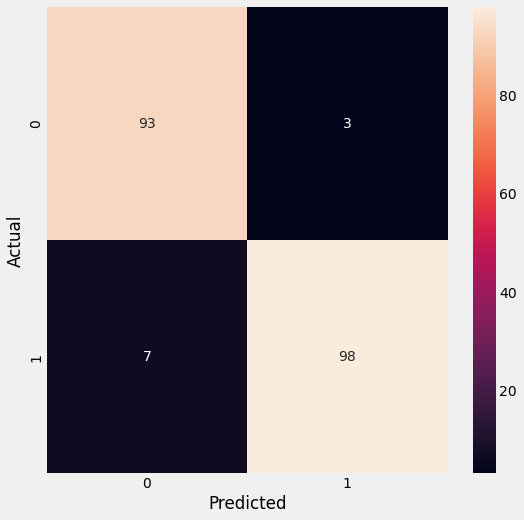

In [116]:
confusion_sgd=confusion_matrix(ytest,sgd.predict(xtest))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_sgd,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [117]:
print(classification_report(ytest,y_pred_sgd))


              precision    recall  f1-score   support

           0       0.93      0.97      0.95        96
           1       0.97      0.93      0.95       105

    accuracy                           0.95       201
   macro avg       0.95      0.95      0.95       201
weighted avg       0.95      0.95      0.95       201



**Gradient Boosting Classifier - 96%**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
param_grid = {
    'learning_rate' : [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1],
    'n_estimators': [50, 75,100, 150, 200,300],
}


In [ ]:

gbc=RandomizedSearchCV(GradientBoostingClassifier(random_state=42),param_grid,cv=5)
gbc.fit(xtrain,ytrain)
y_pred_gbc=gbc.predict(xtest)

Text(24.58, 0.5, 'Actual')

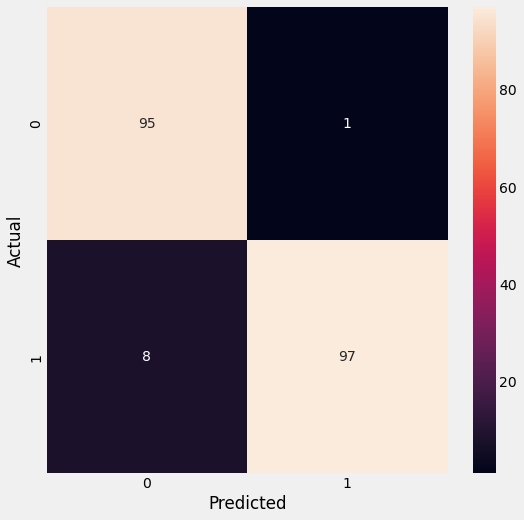

In [ ]:
confusion_gbc=confusion_matrix(ytest,y_pred_gbc)
plt.figure(figsize=(8,8))
sns.heatmap(confusion_gbc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [ ]:
print(classification_report(ytest,y_pred_gbc))
print(f'\nBest Parameter: {gbc.best_params_}\n')

              precision    recall  f1-score   support

           0       0.92      0.99      0.95        96
           1       0.99      0.92      0.96       105

    accuracy                           0.96       201
   macro avg       0.96      0.96      0.96       201
weighted avg       0.96      0.96      0.96       201


Best Parameter: {'n_estimators': 200, 'learning_rate': 1}



crosscheck

In [ ]:
GradientBoosting_model = GradientBoostingClassifier(n_estimators = 150, learning_rate = 0.5)

GradientBoosting_model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.5, n_estimators=150)

In [ ]:
GradientBoosting_model.score(X_test,y_test)

0.957983193277311

#SGD

In [118]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()

In [119]:
sgd.fit(xtrain,ytrain)

SGDClassifier()

In [120]:
sgd.score(xtest,ytest) #under a chilo 82%

0.9402985074626866

#random forest

In [121]:
from sklearn.ensemble import RandomForestClassifier

In [122]:
clf = RandomForestClassifier() # default parameters

In [123]:
clf.fit(xtrain,ytrain)

RandomForestClassifier()

In [124]:
clf.score(xtest,ytest) #under 80% chilo

0.9253731343283582

In [125]:
clf.score(xtest, ytest)

0.9253731343283582

In [126]:
clf.score(xtrain, ytrain)

1.0

overfitting hocche

In [ ]:
#feature scaling(NOrmalization) lagbe PCA korar jnno 

#tuning

#SVM with best accuracy

In [127]:
from sklearn import svm
sv = svm.SVC(kernel='linear') #poly', 'rbf', 'sigmoid', 'precomputed'

In [128]:
sv.fit(xtrain,ytrain)

SVC(kernel='linear')

In [129]:
y_pred = sv.predict(xtest)

In [130]:
sv.score(xtest,ytest) #under a chilo kom chilo

0.945273631840796

In [131]:
sv.score(xtrain,ytrain)

1.0

#logistic regression

In [132]:
from sklearn.linear_model import LogisticRegression

In [133]:
logit = LogisticRegression(C = 0.1, 
                            penalty = 'l2', 
                            solver = 'liblinear') #solver liblinear for small dataset


In [134]:
logit.fit(xtrain,ytrain)

LogisticRegression(C=0.1, solver='liblinear')

In [135]:
logit.score(xtest,ytest) #under a 91%

0.945273631840796

In [136]:
logit.score(xtrain,ytrain)

0.9983416252072969

#KNN

In [137]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=10)

In [138]:
KNN.fit(xtrain,ytrain)

KNN.score(xtest,ytest)

0.7661691542288557

In [139]:
KNN.score(xtrain,ytrain)

0.7512437810945274

In [140]:
xtrain.columns

Index(['ENSG00000000419', 'ENSG00000000938', 'ENSG00000001036',
       'ENSG00000001461', 'ENSG00000001629', 'ENSG00000001631',
       'ENSG00000002330', 'ENSG00000002549', 'ENSG00000002586',
       'ENSG00000002822',
       ...
       'ENSG00000267316', 'ENSG00000268555', 'ENSG00000269028',
       'ENSG00000270055', 'ENSG00000271043', 'ENSG00000272053',
       'ENSG00000272168', 'ENSG00000272369', 'ENSG00000272888',
       'ENSG00000273143'],
      dtype='object', name=0, length=4722)

#GradientBoosting

In [141]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
#X_column_header 


In [142]:
scaler = MinMaxScaler()
xtrain_s = scaler.fit_transform(xtrain)
xtest_s = scaler.transform(xtest)

In [ ]:
#Column header is getting removed after standard scaling 
#solution
#scaled_data = pd.DataFrame(scaled)
#scaled_data.columns=data.columns

In [143]:
Xtrain = pd.DataFrame(xtrain_s)

In [144]:
Xtrain.columns=xtrain.columns

In [145]:
Xtrain.columns

Index(['ENSG00000000419', 'ENSG00000000938', 'ENSG00000001036',
       'ENSG00000001461', 'ENSG00000001629', 'ENSG00000001631',
       'ENSG00000002330', 'ENSG00000002549', 'ENSG00000002586',
       'ENSG00000002822',
       ...
       'ENSG00000267316', 'ENSG00000268555', 'ENSG00000269028',
       'ENSG00000270055', 'ENSG00000271043', 'ENSG00000272053',
       'ENSG00000272168', 'ENSG00000272369', 'ENSG00000272888',
       'ENSG00000273143'],
      dtype='object', name=0, length=4722)

In [146]:
Xtrain.shape

(603, 4722)

In [147]:
xtrain=Xtrain

In [148]:
xtrain.columns

Index(['ENSG00000000419', 'ENSG00000000938', 'ENSG00000001036',
       'ENSG00000001461', 'ENSG00000001629', 'ENSG00000001631',
       'ENSG00000002330', 'ENSG00000002549', 'ENSG00000002586',
       'ENSG00000002822',
       ...
       'ENSG00000267316', 'ENSG00000268555', 'ENSG00000269028',
       'ENSG00000270055', 'ENSG00000271043', 'ENSG00000272053',
       'ENSG00000272168', 'ENSG00000272369', 'ENSG00000272888',
       'ENSG00000273143'],
      dtype='object', name=0, length=4722)

In [149]:
xtrain.shape

(603, 4722)

In [150]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(xtrain, ytrain)

GradientBoostingClassifier(learning_rate=0.5, max_depth=2, max_features=2,
                           n_estimators=20, random_state=0)

In [151]:
gb_clf2.score(xtest, ytest)

0.572139303482587

In [ ]:
#lr_list =np.random.uniform(0,1,1000)
#x = -1
#a = -1
#for learning_rate in lr_list:
 #   gb_clf = GradientBoostingClassifier(loss="deviance" ,n_estimators=2, learning_rate=learning_rate, max_features="auto", max_depth=2, random_state=0)
  #  gb_clf.fit(xtrain, ytrain)

   # print("Learning rate: ", learning_rate)
    #print("Accuracy score (training): {0:.3f}".format(gb_clf.score(xtrain, ytrain)))
    #a = gb_clf.score(xtest, ytest)
    #print("Accuracy score (validation): {0:.3f}".format(a))
    #x = max(a,x)

#print("x -----------> " ,x)   

In [152]:
gb_clf2 = GradientBoostingClassifier(n_estimators=700, learning_rate=0.8842341212901953, max_features=1090, max_depth=180, random_state=0)
gb_clf2.fit(xtrain, ytrain)
gb_clf2.score(xtest, ytest)

0.4925373134328358

In [153]:
xtrain.columns

Index(['ENSG00000000419', 'ENSG00000000938', 'ENSG00000001036',
       'ENSG00000001461', 'ENSG00000001629', 'ENSG00000001631',
       'ENSG00000002330', 'ENSG00000002549', 'ENSG00000002586',
       'ENSG00000002822',
       ...
       'ENSG00000267316', 'ENSG00000268555', 'ENSG00000269028',
       'ENSG00000270055', 'ENSG00000271043', 'ENSG00000272053',
       'ENSG00000272168', 'ENSG00000272369', 'ENSG00000272888',
       'ENSG00000273143'],
      dtype='object', name=0, length=4722)

#Feature Selection 

#Remove constant features
Using variance threshold from sklearn

In [ ]:
# using sklearn variancethreshold to find constant features
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0)
sel.fit(xtrain)

VarianceThreshold(threshold=0)

In [ ]:
# get_support is a boolean vector that indicates which features are retained
# if we sum over get_support, we get the number of features that are not constant
sum(sel.get_support())

4722

In [ ]:
xtrain.shape

(603, 4722)

In [ ]:
#There is no constant features

#Remove quasi-constant features 
Using variance threshold from sklearn

Variance threshold from sklearn is a simple baseline approach to feature selection. It removes all features which variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e., features that have the same value in all samples.



Here, I will change the default threshold to remove almost / quasi-constant features

In [ ]:
sel = VarianceThreshold(threshold=0.01)  # 0.1 indicates 99% of observations approximately

sel.fit(xtrain)  # fit finds the features with low variance

VarianceThreshold(threshold=0.01)

In [ ]:
# get_support is a boolean vector that indicates which features 
# are retained. If we sum over get_support, we get the number
# of features that are not quasi-constant
sum(sel.get_support())

4162

In [ ]:
type(xtrain)

pandas.core.frame.DataFrame

In [ ]:
xtrain_df = pd.DataFrame(xtrain)
xtest_df = pd.DataFrame(xtest)

In [ ]:
# finally we can print the quasi-constant features
print(
    len([
        x for x in xtrain_df.columns
        if x not in xtrain_df.columns[sel.get_support()]
    ]))

[x for x in xtrain_df.columns if x not in xtrain_df.columns[sel.get_support()]]

560


['ENSG00000000938',
 'ENSG00000001461',
 'ENSG00000004455',
 'ENSG00000004779',
 'ENSG00000005175',
 'ENSG00000005844',
 'ENSG00000006652',
 'ENSG00000008294',
 'ENSG00000008952',
 'ENSG00000010327',
 'ENSG00000011260',
 'ENSG00000011523',
 'ENSG00000012223',
 'ENSG00000012779',
 'ENSG00000013306',
 'ENSG00000013364',
 'ENSG00000013441',
 'ENSG00000013561',
 'ENSG00000015532',
 'ENSG00000017260',
 'ENSG00000018280',
 'ENSG00000026508',
 'ENSG00000028137',
 'ENSG00000028839',
 'ENSG00000029534',
 'ENSG00000031698',
 'ENSG00000033627',
 'ENSG00000038427',
 'ENSG00000040531',
 'ENSG00000043462',
 'ENSG00000044574',
 'ENSG00000047365',
 'ENSG00000047579',
 'ENSG00000047597',
 'ENSG00000048544',
 'ENSG00000048649',
 'ENSG00000048991',
 'ENSG00000050130',
 'ENSG00000051108',
 'ENSG00000051382',
 'ENSG00000052126',
 'ENSG00000052841',
 'ENSG00000054523',
 'ENSG00000054654',
 'ENSG00000057663',
 'ENSG00000057757',
 'ENSG00000058272',
 'ENSG00000058866',
 'ENSG00000059728',
 'ENSG00000060762',


In [ ]:
# we can then remove the features from training and test set
xtrain_df = sel.transform(xtrain_df)
xtest_df = sel.transform(xtest_df)

In [ ]:
xtrain_df.shape


(603, 4162)

In [ ]:
xtrain.shape #before selection

(603, 4722)

we have reduced features 4722 to 4162

In [ ]:
xtest.shape

(201, 4722)

In [ ]:
xtest_df.shape

(201, 4162)

In [ ]:
ytest

327    4
683    2
521    4
373    4
529    4
      ..
317    4
559    4
684    2
365    4
71     2
Name: disease, Length: 201, dtype: int64

In [ ]:
x_new.head()

,ENSG00000000419,ENSG00000000938,ENSG00000001036,ENSG00000001461,ENSG00000001629,ENSG00000001631,ENSG00000002330,ENSG00000002549,ENSG00000002586,ENSG00000002822,...,ENSG00000267316,ENSG00000268555,ENSG00000269028,ENSG00000270055,ENSG00000271043,ENSG00000272053,ENSG00000272168,ENSG00000272369,ENSG00000272888,ENSG00000273143
0,12,116,68,75,51,37,61,91,5976,1,...,225,340,584,68,181,873,40,70,39,0
1,0,25,19,15,55,20,51,42,5811,6,...,322,142,1299,19,509,1256,94,70,34,0
2,72,56,21,29,45,18,18,45,3677,55,...,148,143,322,18,81,665,56,35,42,0
3,8,13,17,6,19,5,63,4,4001,2,...,366,102,752,24,231,1526,93,70,42,0
4,33,23,52,55,37,20,75,79,7654,8,...,246,326,616,25,170,766,80,36,57,57


In [ ]:
xtrain_df = pd.DataFrame(xtrain_df)

In [ ]:
print(xtrain_df.duplicated().sum())


92


#Univariate selection methods

#SelectKBest

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

In [ ]:
K_best = SelectKBest(chi2, k=20)
K_best.fit(xtrain, ytrain)
# Get columns to keep and create new dataframe with those only
cols = K_best.get_support(indices=True)
features_df_new = x_new.iloc[:,cols]


In [ ]:
features_df_new.columns

Index(['ENSG00000005961', 'ENSG00000021776', 'ENSG00000064012',
       'ENSG00000071994', 'ENSG00000097021', 'ENSG00000100219',
       'ENSG00000101335', 'ENSG00000103202', 'ENSG00000103316',
       'ENSG00000108679', 'ENSG00000112290', 'ENSG00000139278',
       'ENSG00000142089', 'ENSG00000156738', 'ENSG00000159335',
       'ENSG00000163359', 'ENSG00000164483', 'ENSG00000166311',
       'ENSG00000184613', 'ENSG00000213465'],
      dtype='object', name=0)

#SelectPercentile

In [ ]:
from sklearn.feature_selection import SelectPercentile, chi2

In [ ]:
# now select features based on top 10 percentile
Percentile_Best = SelectPercentile(chi2, percentile=0.42).fit(xtrain, ytrain)

In [ ]:
cols = Percentile_Best.get_support(indices=True)
cols
features = x_new.iloc[:,cols]
features.columns

Index(['ENSG00000005961', 'ENSG00000021776', 'ENSG00000064012',
       'ENSG00000071994', 'ENSG00000097021', 'ENSG00000100219',
       'ENSG00000101335', 'ENSG00000103202', 'ENSG00000103316',
       'ENSG00000108679', 'ENSG00000112290', 'ENSG00000139278',
       'ENSG00000142089', 'ENSG00000156738', 'ENSG00000159335',
       'ENSG00000163359', 'ENSG00000164483', 'ENSG00000166311',
       'ENSG00000184613', 'ENSG00000213465'],
      dtype='object', name=0)

In [ ]:
features.shape

(804, 20)

If a candidate scores in the 10th percentile, they have scored higher than 10% of the norm group, putting them in the bottom 10%. 

If a candidate scores in the 50th percentile, this means that the candidate has scored higher than 50% of the norm group (i.e they got a score which is exactly in the middle of what everyone else got)

#Information Gain 

#mutual_info_classif

In [ ]:
xtrain.shape #before Remove quasi-constant features

(603, 4722)

In [ ]:
ytrain.shape # before Remove quasi-constant features

(603,)

In [ ]:
#xtrain_df.shape

In [ ]:
#ytrain_df.shape confused ami cz ytrain er jnno quasi constant remove kori ni

In [ ]:
from sklearn.feature_selection import mutual_info_classif

In [ ]:
mi_score = mutual_info_classif(xtrain, ytrain,n_neighbors=10,random_state=42)

In [ ]:
mi_score

array([0.05127975, 0.01667957, 0.06537031, ..., 0.0375563 , 0.05834546,
       0.04411757])

In [ ]:
type(mi_score)

numpy.ndarray

In [ ]:
#we need to convert mi_score into series for below output
mi_score = pd.Series(mi_score)


In [ ]:
type(xtrain) 

pandas.core.frame.DataFrame

In [ ]:
xtrain = pd.DataFrame(xtrain)

In [ ]:
mi_score.index = xtrain.columns


In [ ]:
mi_score.index

Index(['ENSG00000000419', 'ENSG00000000938', 'ENSG00000001036',
       'ENSG00000001461', 'ENSG00000001629', 'ENSG00000001631',
       'ENSG00000002330', 'ENSG00000002549', 'ENSG00000002586',
       'ENSG00000002822',
       ...
       'ENSG00000267316', 'ENSG00000268555', 'ENSG00000269028',
       'ENSG00000270055', 'ENSG00000271043', 'ENSG00000272053',
       'ENSG00000272168', 'ENSG00000272369', 'ENSG00000272888',
       'ENSG00000273143'],
      dtype='object', name=0, length=4722)

In [ ]:
MI = mi_score.sort_values(ascending=False)

In [ ]:
MI_large = mi_score.nlargest(20)

In [ ]:
MI_large

0
ENSG00000126247    0.148854
ENSG00000177556    0.138273
ENSG00000185825    0.136006
ENSG00000101335    0.134905
ENSG00000104324    0.132738
ENSG00000103876    0.130101
ENSG00000198467    0.126091
ENSG00000075945    0.122829
ENSG00000176407    0.122420
ENSG00000240225    0.122178
ENSG00000163359    0.121956
ENSG00000213465    0.121424
ENSG00000143226    0.121352
ENSG00000149357    0.121101
ENSG00000223609    0.120990
ENSG00000165169    0.120517
ENSG00000182048    0.120460
ENSG00000065978    0.119362
ENSG00000206549    0.117422
ENSG00000120265    0.117193
dtype: float64

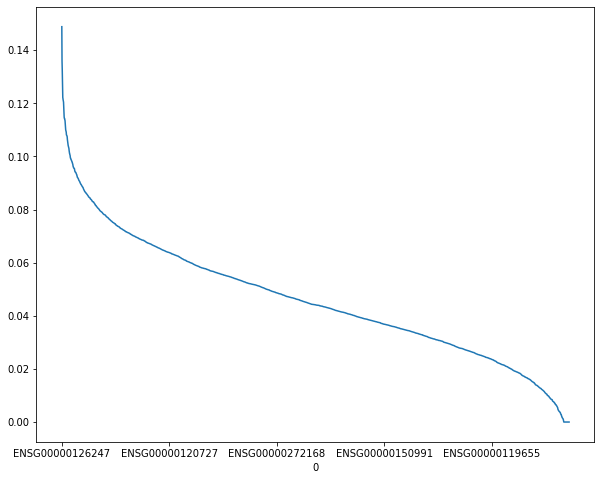

In [ ]:
#let's plot the ordered mutual_info values per features
MI = mi_score.sort_values(ascending=False).plot(figsize=(10,8))

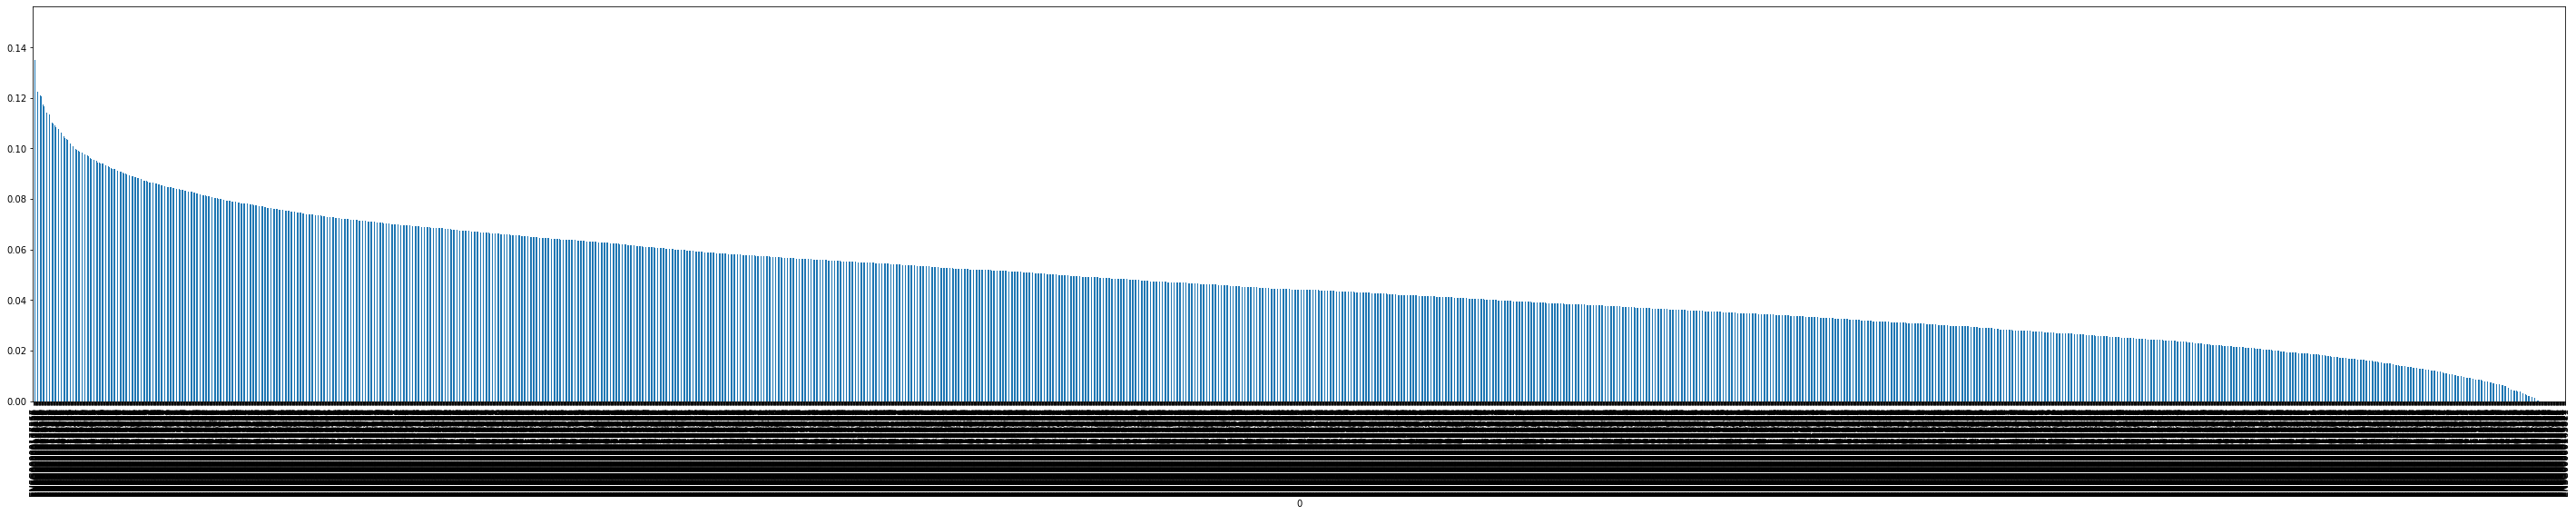

In [ ]:
#let's plot the ordered mutual_info values per features
mi_score.sort_values(ascending=False).plot.bar(figsize=(50,8))

In [ ]:
#we want top 20 features
from sklearn.feature_selection import SelectKBest


In [ ]:
sel_20_col = SelectKBest(mutual_info_classif, k=20)

In [ ]:
sel_20_col.fit(xtrain,ytrain)

SelectKBest(k=20, score_func=<function mutual_info_classif at 0x7ffa8fb79cb0>)

In [ ]:
xtrain.columns[sel_20_col.get_support()]

Index(['ENSG00000023697', 'ENSG00000065978', 'ENSG00000090372',
       'ENSG00000107745', 'ENSG00000111674', 'ENSG00000119801',
       'ENSG00000123739', 'ENSG00000125868', 'ENSG00000131171',
       'ENSG00000143761', 'ENSG00000152229', 'ENSG00000170315',
       'ENSG00000171148', 'ENSG00000172757', 'ENSG00000177556',
       'ENSG00000179526', 'ENSG00000180354', 'ENSG00000184007',
       'ENSG00000198836', 'ENSG00000238683'],
      dtype='object', name=0)

In [ ]:
Best_col_miscore = xtrain.columns[sel_20_col.get_support()]

In [ ]:
Best_col_miscore

Index(['ENSG00000023697', 'ENSG00000065978', 'ENSG00000090372',
       'ENSG00000107745', 'ENSG00000111674', 'ENSG00000119801',
       'ENSG00000123739', 'ENSG00000125868', 'ENSG00000131171',
       'ENSG00000143761', 'ENSG00000152229', 'ENSG00000170315',
       'ENSG00000171148', 'ENSG00000172757', 'ENSG00000177556',
       'ENSG00000179526', 'ENSG00000180354', 'ENSG00000184007',
       'ENSG00000198836', 'ENSG00000238683'],
      dtype='object', name=0)

ENSG00000005961', 'ENSG00000064601', 'ENSG00000075624',
       'ENSG00000092841', 'ENSG00000100243', 'ENSG00000100345',
       'ENSG00000102265', 'ENSG00000104267', 'ENSG00000104904',
       'ENSG00000120885', 'ENSG00000130429', 'ENSG00000137076',
       'ENSG00000142669', 'ENSG00000156265', 'ENSG00000156508',
       'ENSG00000166710', 'ENSG00000173812', 'ENSG00000187109',
       'ENSG00000196924', 'ENSG00000244734

       ENSG00000126247    0.148854
ENSG00000177556    0.138273
ENSG00000185825    0.136006
ENSG00000101335    0.134905
ENSG00000104324    0.132738
ENSG00000103876    0.130101
ENSG00000198467    0.126091
ENSG00000075945    0.122829
ENSG00000176407    0.122420
ENSG00000240225    0.122178
ENSG00000163359    0.121956
ENSG00000213465    0.121424
ENSG00000143226    0.121352
ENSG00000149357    0.121101
ENSG00000223609    0.120990
ENSG00000165169    0.120517
ENSG00000182048    0.120460
ENSG00000065978    0.119362
ENSG00000206549    0.117422
ENSG00000120265

In [ ]:
xtrain.head()

,ENSG00000000419,ENSG00000000938,ENSG00000001036,ENSG00000001461,ENSG00000001629,ENSG00000001631,ENSG00000002330,ENSG00000002549,ENSG00000002586,ENSG00000002822,...,ENSG00000267316,ENSG00000268555,ENSG00000269028,ENSG00000270055,ENSG00000271043,ENSG00000272053,ENSG00000272168,ENSG00000272369,ENSG00000272888,ENSG00000273143
0,0.125000,0.011618,0.254237,0.051136,0.635220,0.802083,0.308411,0.063131,0.289089,0.117647,...,0.460808,0.197561,0.522182,0.247934,0.886076,0.145078,0.169811,0.058065,0.684211,0.069231
1,0.062500,0.021577,0.059322,0.011364,0.031447,0.072917,0.093458,0.012626,0.026836,0.039216,...,0.052257,0.031707,0.018909,0.008264,0.020253,0.020207,0.056604,0.058065,0.078947,0.000000
2,0.007812,0.004149,0.271186,0.011364,0.345912,0.302083,0.504673,0.083333,0.352242,0.189542,...,0.415677,0.226829,0.474182,0.132231,0.569620,0.179275,0.364780,0.238710,0.473684,0.076923
3,0.000000,0.034025,0.347458,0.164773,0.157233,0.197917,0.457944,0.015152,0.521131,0.000000,...,0.239905,0.443902,0.331636,0.396694,0.275949,0.368135,0.169811,0.038710,0.223684,0.434615
4,0.015625,0.002490,0.000000,0.002841,0.044025,0.072917,0.037383,0.000000,0.019846,0.039216,...,0.061758,0.034146,0.058909,0.016529,0.075949,0.066580,0.163522,0.148387,0.144737,0.053846


#comparison of univariate and mutual info

In [ ]:
xtrain.head()

,0,1,2,3,4,5,6,7,8,9,...,4712,4713,4714,4715,4716,4717,4718,4719,4720,4721
0,0.125000,0.011618,0.254237,0.051136,0.635220,0.802083,0.308411,0.063131,0.289089,0.117647,...,0.460808,0.197561,0.522182,0.247934,0.886076,0.145078,0.169811,0.058065,0.684211,0.069231
1,0.062500,0.021577,0.059322,0.011364,0.031447,0.072917,0.093458,0.012626,0.026836,0.039216,...,0.052257,0.031707,0.018909,0.008264,0.020253,0.020207,0.056604,0.058065,0.078947,0.000000
2,0.007812,0.004149,0.271186,0.011364,0.345912,0.302083,0.504673,0.083333,0.352242,0.189542,...,0.415677,0.226829,0.474182,0.132231,0.569620,0.179275,0.364780,0.238710,0.473684,0.076923
3,0.000000,0.034025,0.347458,0.164773,0.157233,0.197917,0.457944,0.015152,0.521131,0.000000,...,0.239905,0.443902,0.331636,0.396694,0.275949,0.368135,0.169811,0.038710,0.223684,0.434615
4,0.015625,0.002490,0.000000,0.002841,0.044025,0.072917,0.037383,0.000000,0.019846,0.039216,...,0.061758,0.034146,0.058909,0.016529,0.075949,0.066580,0.163522,0.148387,0.144737,0.053846


#mutual_info_regression

#LASSO Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

In [ ]:
xtrain.shape

(603, 4722)

In [ ]:
#to scale them
scaler = StandardScaler()
scaler.fit(xtrain.fillna(0))

StandardScaler()

In [ ]:
# here, again I will train a Lasso Linear regression and select
# the non zero features in one line.
# bear in mind that the linear regression object from sklearn does
# not allow for regularisation. So If you want to make a regularised
# linear regression you need to import specifically "Lasso"
# that is the l1 version of the linear regression
# alpha is the penalisation here, so I set it high in order
# to force the algorithm to shrink some coefficients

sel_ = SelectFromModel(Lasso(alpha=0))
sel_.fit(scaler.transform(xtrain.fillna(0)), ytrain)

SelectFromModel(estimator=Lasso(alpha=0))

In [ ]:
sel_.get_support()

array([ True,  True,  True, ...,  True,  True,  True])

In [ ]:
# make a list with the selected features and print the outputs
selected_feat = xtrain.columns[(sel_.get_support())]


In [ ]:
xtrain.shape

(603, 4722)

In [ ]:
len(selected_feat)

4718

#Random Forest Importance

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [ ]:
x_new.shape

(804, 4722)

In [ ]:
# Normalize feature vector
X = StandardScaler().fit_transform(x_new)

In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size = 0.30, random_state = 0)

In [ ]:
# instantiate the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)

In [ ]:
# fit the classifier to the training set
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
# predict on the test set
y_pred = clf.predict(X_test)

In [ ]:
y_pred

array([2, 4, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2, 4,
       4, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 2, 4,
       4, 2, 4, 2, 4, 2, 2, 4, 4, 2, 4, 4, 2, 4, 4, 4, 4, 2, 4, 2, 2, 2,
       2, 4, 4, 4, 2, 4, 4, 4, 2, 4, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2,
       2, 2, 2, 2, 4, 2, 4, 4, 2, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4,
       2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 4, 4, 4, 2, 4, 4, 4, 4, 2, 4, 2, 2,
       4, 2, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 4, 4, 2, 4, 4, 2, 2, 4,
       2, 4, 4, 2, 2, 4, 2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 4, 2, 4, 4,
       2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 4, 4, 4, 2, 2, 4, 4, 4,
       2, 4, 2, 4, 4, 4, 2, 4, 4, 2, 4, 2, 2, 4, 4, 2, 4, 4, 2, 2, 2, 4,
       2, 2, 4, 2, 2, 4, 4, 4, 2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2, 4, 2, 2])

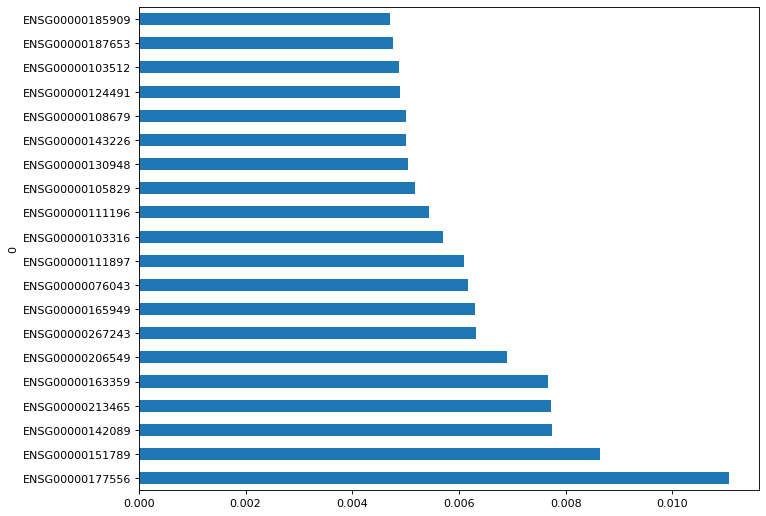

In [ ]:
# visualize feature importance
import matplotlib.pyplot as plt
plt.figure(num=None, figsize=(10,8),dpi=80)
feat_importances = pd.Series(clf.feature_importances_, index= x_new.columns)
feat_importances.nlargest(20).plot(kind='barh')


In [ ]:
n_larg = feat_importances.nlargest(20)

In [ ]:
n_larg

0
ENSG00000177556    0.011067
ENSG00000151789    0.008648
ENSG00000142089    0.007752
ENSG00000213465    0.007731
ENSG00000163359    0.007671
ENSG00000206549    0.006892
ENSG00000267243    0.006313
ENSG00000165949    0.006296
ENSG00000076043    0.006170
ENSG00000111897    0.006087
ENSG00000103316    0.005709
ENSG00000111196    0.005430
ENSG00000105829    0.005184
ENSG00000130948    0.005040
ENSG00000143226    0.005000
ENSG00000108679    0.004999
ENSG00000124491    0.004887
ENSG00000103512    0.004873
ENSG00000187653    0.004757
ENSG00000185909    0.004716
dtype: float64

#feature selection

heatmap draw korte seaborn lagbe

In [ ]:
X.head()

,ENSG00000000419,ENSG00000000938,ENSG00000001036,ENSG00000001461,ENSG00000001629,ENSG00000001631,ENSG00000002330,ENSG00000002549,ENSG00000002586,ENSG00000002822,...,ENSG00000267316,ENSG00000268555,ENSG00000269028,ENSG00000270055,ENSG00000271043,ENSG00000272053,ENSG00000272168,ENSG00000272369,ENSG00000272888,ENSG00000273143
0,12,116,68,75,51,37,61,91,5976,1,...,225,340,584,68,181,873,40,70,39,0
1,0,25,19,15,55,20,51,42,5811,6,...,322,142,1299,19,509,1256,94,70,34,0
2,72,56,21,29,45,18,18,45,3677,55,...,148,143,322,18,81,665,56,35,42,0
3,8,13,17,6,19,5,63,4,4001,2,...,366,102,752,24,231,1526,93,70,42,0
4,33,23,52,55,37,20,75,79,7654,8,...,246,326,616,25,170,766,80,36,57,57


In [ ]:
type(X)

pandas.core.frame.DataFrame

In [ ]:
type(xtrain)

numpy.ndarray

In [ ]:
type(ytrain)

pandas.core.series.Series

In [ ]:
xtrain

array([[0.0390625 , 0.01991701, 0.3220339 , ..., 0.27102804, 0.65789474,
        0.02692308],
       [0.0703125 , 0.04149378, 0.05932203, ..., 0.        , 0.07894737,
        0.00384615],
       [0.3828125 , 0.6473029 , 0.27966102, ..., 0.12149533, 0.53947368,
        0.        ],
       ...,
       [0.        , 0.        , 0.28813559, ..., 0.27102804, 0.36842105,
        0.05384615],
       [0.03125   , 0.00995851, 0.22033898, ..., 0.1682243 , 0.23684211,
        0.00384615],
       [0.0234375 , 0.00995851, 0.10169492, ..., 0.1588785 , 0.14473684,
        0.01923077]])

xtrain,xtest agula numpy array te ache, segula k data frame a conver kori

In [ ]:
xtrain = pd.DataFrame(xtrain)


In [ ]:
xtest = pd.DataFrame(xtest)

In [ ]:
xtrain.shape

(443, 4722)

In [ ]:
X_column_header.shape

(0, 4722)

In [ ]:
#ekhane xtrain er column header soho normalize hoye gece, amra eta thik krbo. #How to Rename Columns in Pandas 
#xtrain.columns = X_column_header.iloc[0]

In [ ]:
xtrain

,0,1,2,3,4,5,6,7,8,9,...,4712,4713,4714,4715,4716,4717,4718,4719,4720,4721
0,0.039062,0.019917,0.322034,0.204545,0.425743,0.264151,0.515152,0.169192,0.570705,0.000000,...,0.650118,0.625316,0.654294,0.533898,0.685658,0.253886,0.322785,0.271028,0.657895,0.026923
1,0.070312,0.041494,0.059322,0.039773,0.089109,0.367925,0.020202,0.047980,0.033103,0.130719,...,0.030733,0.020253,0.028384,0.000000,0.021611,0.013472,0.025316,0.000000,0.078947,0.003846
2,0.382812,0.647303,0.279661,0.056818,0.247525,0.018868,0.232323,0.419192,0.096336,0.777778,...,0.198582,0.088608,0.042213,0.067797,0.056974,0.061658,0.050633,0.121495,0.539474,0.000000
3,0.101562,0.043983,0.169492,0.116477,0.029703,0.056604,0.191919,0.078283,0.285313,0.019608,...,0.184397,0.070886,0.031295,0.059322,0.049116,0.051813,0.227848,0.504673,0.210526,0.065385
4,0.031250,0.048963,0.211864,0.002841,0.089109,0.028302,0.000000,0.103535,0.020730,0.209150,...,0.016548,0.005063,0.125182,0.025424,0.110020,0.010104,0.037975,0.028037,0.052632,0.007692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,0.023438,0.007469,0.000000,0.002841,0.019802,0.018868,0.030303,0.002525,0.022578,0.000000,...,0.096927,0.098734,0.462882,0.025424,0.526523,0.018653,0.063291,0.682243,0.105263,0.061538
439,0.054688,0.008299,0.042373,0.019886,0.188119,0.103774,0.111111,0.025253,0.041780,0.039216,...,0.033097,0.025316,0.043668,0.016949,0.055010,0.010104,0.044304,0.018692,0.078947,0.007692
440,0.000000,0.000000,0.288136,0.159091,0.079208,0.764151,0.383838,0.282828,0.624618,0.000000,...,0.177305,0.463291,0.393741,0.101695,0.300589,0.229534,0.202532,0.271028,0.368421,0.053846
441,0.031250,0.009959,0.220339,0.096591,0.069307,0.009434,0.313131,0.111111,0.293428,0.006536,...,0.139480,0.283544,0.116448,0.254237,0.076621,0.163990,0.215190,0.168224,0.236842,0.003846


In [ ]:
#xtrain.columns = xtrain.iloc[0]

In [ ]:
xtrain

,0,1,2,3,4,5,6,7,8,9,...,4712,4713,4714,4715,4716,4717,4718,4719,4720,4721
0,0.039062,0.019917,0.322034,0.204545,0.425743,0.264151,0.515152,0.169192,0.570705,0.000000,...,0.650118,0.625316,0.654294,0.533898,0.685658,0.253886,0.322785,0.271028,0.657895,0.026923
1,0.070312,0.041494,0.059322,0.039773,0.089109,0.367925,0.020202,0.047980,0.033103,0.130719,...,0.030733,0.020253,0.028384,0.000000,0.021611,0.013472,0.025316,0.000000,0.078947,0.003846
2,0.382812,0.647303,0.279661,0.056818,0.247525,0.018868,0.232323,0.419192,0.096336,0.777778,...,0.198582,0.088608,0.042213,0.067797,0.056974,0.061658,0.050633,0.121495,0.539474,0.000000
3,0.101562,0.043983,0.169492,0.116477,0.029703,0.056604,0.191919,0.078283,0.285313,0.019608,...,0.184397,0.070886,0.031295,0.059322,0.049116,0.051813,0.227848,0.504673,0.210526,0.065385
4,0.031250,0.048963,0.211864,0.002841,0.089109,0.028302,0.000000,0.103535,0.020730,0.209150,...,0.016548,0.005063,0.125182,0.025424,0.110020,0.010104,0.037975,0.028037,0.052632,0.007692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,0.023438,0.007469,0.000000,0.002841,0.019802,0.018868,0.030303,0.002525,0.022578,0.000000,...,0.096927,0.098734,0.462882,0.025424,0.526523,0.018653,0.063291,0.682243,0.105263,0.061538
439,0.054688,0.008299,0.042373,0.019886,0.188119,0.103774,0.111111,0.025253,0.041780,0.039216,...,0.033097,0.025316,0.043668,0.016949,0.055010,0.010104,0.044304,0.018692,0.078947,0.007692
440,0.000000,0.000000,0.288136,0.159091,0.079208,0.764151,0.383838,0.282828,0.624618,0.000000,...,0.177305,0.463291,0.393741,0.101695,0.300589,0.229534,0.202532,0.271028,0.368421,0.053846
441,0.031250,0.009959,0.220339,0.096591,0.069307,0.009434,0.313131,0.111111,0.293428,0.006536,...,0.139480,0.283544,0.116448,0.254237,0.076621,0.163990,0.215190,0.168224,0.236842,0.003846


In [ ]:
 xxf = list(X_column_header)
 xxf

['ENSG00000000419',
 'ENSG00000000938',
 'ENSG00000001036',
 'ENSG00000001461',
 'ENSG00000001629',
 'ENSG00000001631',
 'ENSG00000002330',
 'ENSG00000002549',
 'ENSG00000002586',
 'ENSG00000002822',
 'ENSG00000002834',
 'ENSG00000003056',
 'ENSG00000003402',
 'ENSG00000003436',
 'ENSG00000003756',
 'ENSG00000004059',
 'ENSG00000004142',
 'ENSG00000004455',
 'ENSG00000004487',
 'ENSG00000004534',
 'ENSG00000004700',
 'ENSG00000004779',
 'ENSG00000004866',
 'ENSG00000004897',
 'ENSG00000005007',
 'ENSG00000005020',
 'ENSG00000005022',
 'ENSG00000005059',
 'ENSG00000005075',
 'ENSG00000005175',
 'ENSG00000005194',
 'ENSG00000005238',
 'ENSG00000005249',
 'ENSG00000005302',
 'ENSG00000005339',
 'ENSG00000005483',
 'ENSG00000005486',
 'ENSG00000005700',
 'ENSG00000005810',
 'ENSG00000005812',
 'ENSG00000005844',
 'ENSG00000005882',
 'ENSG00000005893',
 'ENSG00000005955',
 'ENSG00000005961',
 'ENSG00000006007',
 'ENSG00000006015',
 'ENSG00000006114',
 'ENSG00000006125',
 'ENSG00000006459',


In [ ]:
xtrain.columns = xxf

In [ ]:
xtrain

,ENSG00000000419,ENSG00000000938,ENSG00000001036,ENSG00000001461,ENSG00000001629,ENSG00000001631,ENSG00000002330,ENSG00000002549,ENSG00000002586,ENSG00000002822,...,ENSG00000267316,ENSG00000268555,ENSG00000269028,ENSG00000270055,ENSG00000271043,ENSG00000272053,ENSG00000272168,ENSG00000272369,ENSG00000272888,ENSG00000273143
0,0.039062,0.019917,0.322034,0.204545,0.425743,0.264151,0.515152,0.169192,0.570705,0.000000,...,0.650118,0.625316,0.654294,0.533898,0.685658,0.253886,0.322785,0.271028,0.657895,0.026923
1,0.070312,0.041494,0.059322,0.039773,0.089109,0.367925,0.020202,0.047980,0.033103,0.130719,...,0.030733,0.020253,0.028384,0.000000,0.021611,0.013472,0.025316,0.000000,0.078947,0.003846
2,0.382812,0.647303,0.279661,0.056818,0.247525,0.018868,0.232323,0.419192,0.096336,0.777778,...,0.198582,0.088608,0.042213,0.067797,0.056974,0.061658,0.050633,0.121495,0.539474,0.000000
3,0.101562,0.043983,0.169492,0.116477,0.029703,0.056604,0.191919,0.078283,0.285313,0.019608,...,0.184397,0.070886,0.031295,0.059322,0.049116,0.051813,0.227848,0.504673,0.210526,0.065385
4,0.031250,0.048963,0.211864,0.002841,0.089109,0.028302,0.000000,0.103535,0.020730,0.209150,...,0.016548,0.005063,0.125182,0.025424,0.110020,0.010104,0.037975,0.028037,0.052632,0.007692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,0.023438,0.007469,0.000000,0.002841,0.019802,0.018868,0.030303,0.002525,0.022578,0.000000,...,0.096927,0.098734,0.462882,0.025424,0.526523,0.018653,0.063291,0.682243,0.105263,0.061538
439,0.054688,0.008299,0.042373,0.019886,0.188119,0.103774,0.111111,0.025253,0.041780,0.039216,...,0.033097,0.025316,0.043668,0.016949,0.055010,0.010104,0.044304,0.018692,0.078947,0.007692
440,0.000000,0.000000,0.288136,0.159091,0.079208,0.764151,0.383838,0.282828,0.624618,0.000000,...,0.177305,0.463291,0.393741,0.101695,0.300589,0.229534,0.202532,0.271028,0.368421,0.053846
441,0.031250,0.009959,0.220339,0.096591,0.069307,0.009434,0.313131,0.111111,0.293428,0.006536,...,0.139480,0.283544,0.116448,0.254237,0.076621,0.163990,0.215190,0.168224,0.236842,0.003846


cmap    --->   matplotlib colormap name or object, or list of colors, optional
The mapping from data values to color space. If not provided, the default will depend on whether center is set.

In [ ]:
cor = xtrain.corr()

In [ ]:
cor

,ENSG00000000419,ENSG00000000938,ENSG00000001036,ENSG00000001461,ENSG00000001629,ENSG00000001631,ENSG00000002330,ENSG00000002549,ENSG00000002586,ENSG00000002822,...,ENSG00000267316,ENSG00000268555,ENSG00000269028,ENSG00000270055,ENSG00000271043,ENSG00000272053,ENSG00000272168,ENSG00000272369,ENSG00000272888,ENSG00000273143
ENSG00000000419,1.000000,0.611429,0.393720,0.237193,0.183572,0.369143,0.226540,0.497173,0.150450,0.600303,...,0.151788,0.135524,0.042129,0.207018,0.021593,0.173371,0.110659,0.117674,0.352326,0.067992
ENSG00000000938,0.611429,1.000000,0.413367,0.156716,0.174606,0.283840,0.100648,0.611975,0.056166,0.744339,...,0.070774,0.054660,-0.015878,0.079415,-0.026135,0.065161,0.047156,-0.000180,0.289742,-0.014124
ENSG00000001036,0.393720,0.413367,1.000000,0.466044,0.398830,0.456984,0.652238,0.536131,0.663446,0.317805,...,0.632661,0.597226,0.325020,0.554971,0.303892,0.554612,0.538519,0.436067,0.701513,0.303229
ENSG00000001461,0.237193,0.156716,0.466044,1.000000,0.334595,0.296543,0.586287,0.292205,0.555218,0.109781,...,0.274572,0.408083,0.174587,0.428793,0.161516,0.310184,0.402642,0.340077,0.432118,0.408126
ENSG00000001629,0.183572,0.174606,0.398830,0.334595,1.000000,0.424812,0.507756,0.307426,0.488200,0.099219,...,0.447615,0.392842,0.450403,0.440190,0.487422,0.417762,0.400842,0.404575,0.552288,0.170051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000272053,0.173371,0.065161,0.554612,0.310184,0.417762,0.273934,0.631457,0.340937,0.693447,-0.015749,...,0.686781,0.627518,0.592531,0.657828,0.544690,1.000000,0.590796,0.543437,0.623395,0.315569
ENSG00000272168,0.110659,0.047156,0.538519,0.402642,0.400842,0.311656,0.701376,0.295689,0.699341,0.020636,...,0.704152,0.592630,0.512767,0.551478,0.501082,0.590796,1.000000,0.636551,0.589068,0.354648
ENSG00000272369,0.117674,-0.000180,0.436067,0.340077,0.404575,0.272218,0.606644,0.215096,0.548552,-0.022679,...,0.682606,0.482791,0.450625,0.509139,0.449152,0.543437,0.636551,1.000000,0.552981,0.241822
ENSG00000272888,0.352326,0.289742,0.701513,0.432118,0.552288,0.448789,0.775731,0.500240,0.744164,0.224989,...,0.751350,0.654674,0.489193,0.704057,0.467532,0.623395,0.589068,0.552981,1.000000,0.222755


with the following function we can selsct highly correlated features.

It will remove the first feature that is correlated with anything other feature

In [ ]:
def correlation(dataset, threshold):
    col_corr = set() #set of all the names of correlated columns
    corr_matrix = dataset.corr() #correlation matrix

    for i in range(len(corr_matrix.columns)): # matrix er each column i c
        for j in range (i): #each column er moddhe (row) column
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i] #getting the name of the column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features  =  correlation(xtrain,0.70)

In [ ]:
corr_features

{'ENSG00000124772',
 'ENSG00000100354',
 'ENSG00000106211',
 'ENSG00000140479',
 'ENSG00000135823',
 'ENSG00000119397',
 'ENSG00000187097',
 'ENSG00000044459',
 'ENSG00000079134',
 'ENSG00000119541',
 'ENSG00000164808',
 'ENSG00000251399',
 'ENSG00000111711',
 'ENSG00000018280',
 'ENSG00000167658',
 'ENSG00000130520',
 'ENSG00000134905',
 'ENSG00000148690',
 'ENSG00000180190',
 'ENSG00000185946',
 'ENSG00000175854',
 'ENSG00000164674',
 'ENSG00000132950',
 'ENSG00000137225',
 'ENSG00000100347',
 'ENSG00000028137',
 'ENSG00000101856',
 'ENSG00000106477',
 'ENSG00000137776',
 'ENSG00000159658',
 'ENSG00000132912',
 'ENSG00000067334',
 'ENSG00000103811',
 'ENSG00000118181',
 'ENSG00000130985',
 'ENSG00000138735',
 'ENSG00000165782',
 'ENSG00000184432',
 'ENSG00000131876',
 'ENSG00000197912',
 'ENSG00000214253',
 'ENSG00000164024',
 'ENSG00000138443',
 'ENSG00000156467',
 'ENSG00000075785',
 'ENSG00000104946',
 'ENSG00000133742',
 'ENSG00000100359',
 'ENSG00000092199',
 'ENSG00000101940',


In [ ]:
len(corr_features)

4242

In [ ]:
xtrain.shape

(443, 4722)

In [ ]:
xtrain.drop(corr_features, axis=1)

,ENSG00000000419,ENSG00000000938,ENSG00000001036,ENSG00000001461,ENSG00000001629,ENSG00000001631,ENSG00000002330,ENSG00000002549,ENSG00000002834,ENSG00000003056,...,ENSG00000233614,ENSG00000234456,ENSG00000236304,ENSG00000237419,ENSG00000243955,ENSG00000248538,ENSG00000249203,ENSG00000257207,ENSG00000264538,ENSG00000273143
0,0.039062,0.019917,0.322034,0.204545,0.425743,0.264151,0.515152,0.169192,0.295082,0.166220,...,0.174927,0.075342,0.374150,0.088710,0.096045,0.266436,0.000000,0.003847,0.359375,0.026923
1,0.070312,0.041494,0.059322,0.039773,0.089109,0.367925,0.020202,0.047980,0.106557,0.053619,...,0.017493,0.000000,0.003401,0.016129,0.002825,0.000000,0.000000,0.033985,0.070312,0.003846
2,0.382812,0.647303,0.279661,0.056818,0.247525,0.018868,0.232323,0.419192,0.295082,0.568365,...,0.164237,0.004110,0.030612,0.056452,0.053672,0.051903,0.000000,0.000962,0.132812,0.000000
3,0.101562,0.043983,0.169492,0.116477,0.029703,0.056604,0.191919,0.078283,0.049180,0.050938,...,0.309038,0.006849,0.078231,0.064516,0.135593,0.000000,0.083333,0.398846,0.054688,0.065385
4,0.031250,0.048963,0.211864,0.002841,0.089109,0.028302,0.000000,0.103535,0.024590,0.053619,...,0.004859,0.013699,0.013605,0.008065,0.000000,0.010381,0.000000,0.007695,0.085938,0.007692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,0.023438,0.007469,0.000000,0.002841,0.019802,0.018868,0.030303,0.002525,0.040984,0.002681,...,0.034985,0.013699,0.010204,0.024194,0.166667,0.013841,0.000000,0.009618,0.062500,0.061538
439,0.054688,0.008299,0.042373,0.019886,0.188119,0.103774,0.111111,0.025253,0.008197,0.016086,...,0.090379,0.035616,0.047619,0.000000,0.014124,0.010381,0.016667,0.054825,0.078125,0.007692
440,0.000000,0.000000,0.288136,0.159091,0.079208,0.764151,0.383838,0.282828,0.286885,0.273458,...,0.088435,0.101370,0.187075,0.161290,0.223164,0.024221,0.125000,0.002244,0.000000,0.053846
441,0.031250,0.009959,0.220339,0.096591,0.069307,0.009434,0.313131,0.111111,0.040984,0.069705,...,0.244898,0.142466,0.020408,0.104839,0.081921,0.252595,0.066667,0.352998,0.023438,0.003846


In [ ]:
xtrain.shape

(443, 4722)

In [ ]:
#sns.heatmap(cor, annot=True)


In [ ]:
#plt.figure(figsize=(12,10))


In [ ]:
#plt.show()